# Install MNE

In [1]:
!pip install mne --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 31.6 MB/s eta 0:00:00


# Imports

In [5]:
from tqdm.notebook import tqdm
from glob import glob

import numpy as np
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt

import mne
from mne.stats import permutation_cluster_1samp_test, permutation_cluster_test
# from acareeg.visualization import plot_values_topomap

sns.set_style("darkgrid")

# Setup Google Cloud Bucket

In [6]:
from google.colab import auth
auth.authenticate_user()

In [7]:
!sudo apt-get update --quiet
!sudo apt-get install pkg-config libfuse-dev libcurl4-openssl-dev libxml2-dev jq --quiet

!wget https://github.com/GoogleCloudPlatform/gcsfuse/releases/download/v0.41.12/gcsfuse_0.41.12_amd64.deb  --no-verbose
!sudo dpkg -i gcsfuse_0.41.12_amd64.deb


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,606 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,582 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restr

In [8]:
!gcsfuse --version

gcsfuse version 0.41.12 (Go version go1.18.4)


In [9]:
!apt-get install gcsfuse --quiet

Reading package lists...
Building dependency tree...
Reading state information...
gcsfuse is already the newest version (0.41.12).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [10]:
!mkdir ucsd_data
!gcsfuse --implicit-dirs bucket-ucsd-itc ucsd_data

2024/01/07 17:10:09.029066 Start gcsfuse/0.41.12 (Go version go1.18.4) for app "" using mount point: /content/ucsd_data
2024/01/07 17:10:09.045980 Opening GCS connection...
2024/01/07 17:10:09.484345 Mounting file system "bucket-ucsd-itc"...
2024/01/07 17:10:09.484843 File system has been successfully mounted.


# Get our UCSD repo code

In [11]:
!git clone https://github.com/scott-huberty/2024-ucsd-itc.git

Cloning into '2024-ucsd-itc'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 567.88 KiB | 9.63 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
%cd 2024-ucsd-itc/ucsd
import experiment_1 as ucsd
%cd ../../

# Begin Analysis

In [16]:
center = ['E5','E6','E7','E12','E106','E112','E129']
front = ['E4','E11','E19']

frontal_roi = ['E18','E19','E23','E24','E27','E3','E4','E10','E118','E123','E124'] # From TensorPacs
temporal_rh = ['E103','E109','E110','E116']
temporal_lh = ['E34','E35','E40', 'E41']

In [18]:
fnames = "ucsd_data/sub-0*.nc"
ds = ucsd.read_netcdfs(fnames, dim='ID', variable='morlet_induced_power')

In [22]:
ds

<xarray.DataArray 'morlet_induced_power' (ID: 28, condition: 4, channel: 104,
                                          frequency: 37, time: 1101)>
array([[[[[3.42151372e-03, 3.50966106e-03, 3.59950856e-03, ...,
           1.46327865e-02, 1.45306559e-02, 1.44265270e-02],
          [2.84291397e-03, 2.91960047e-03, 2.99809387e-03, ...,
           1.16592254e-02, 1.15810518e-02, 1.14992471e-02],
          [2.60249292e-03, 2.67241285e-03, 2.74395593e-03, ...,
           9.77989881e-03, 9.71567398e-03, 9.64619637e-03],
          ...,
          [6.67394999e-04, 6.60325716e-04, 6.37247104e-04, ...,
           1.24438757e-03, 1.32398190e-03, 1.36132778e-03],
          [6.50879126e-04, 6.42422305e-04, 6.17415787e-04, ...,
           1.20370668e-03, 1.28557044e-03, 1.32440237e-03],
          [6.35274440e-04, 6.25466502e-04, 5.98576403e-04, ...,
           1.16498257e-03, 1.24906679e-03, 1.28936921e-03]],

         [[4.45707425e-04, 4.57541583e-04, 4.69618558e-04, ...,
           1.87379349e-03, 1.85902625e-03, 1.84411574e-03],
          [3.72936678e-04, 3.83134848e-04, 3.93582553e-04, ...,
           1.49423749e-03, 1.48413432e-03, 1.47365956e-03],
          [3.52470844e-04, 3.62060950e-04, 3.71872210e-04, ...,
           1.28538019e-03, 1.27783966e-03, 1.26964865e-03],
...
          [1.23009191e-04, 1.31901130e-04, 1.39558190e-04, ...,
           1.19690914e-04, 1.18158024e-04, 1.14874758e-04],
          [1.20186823e-04, 1.28890169e-04, 1.36270809e-04, ...,
           1.16635473e-04, 1.15361875e-04, 1.12260475e-04],
          [1.17482811e-04, 1.26005018e-04, 1.33118959e-04, ...,
           1.13714323e-04, 1.12692385e-04, 1.09766382e-04]],

         [[3.08736369e-04, 3.15172788e-04, 3.21715165e-04, ...,
           7.21805567e-04, 7.15250814e-04, 7.08653512e-04],
          [2.91397671e-04, 2.97282812e-04, 3.03258634e-04, ...,
           6.54614296e-04, 6.48217814e-04, 6.41714241e-04],
          [3.14629677e-04, 3.21182128e-04, 3.27803918e-04, ...,
           6.34730679e-04, 6.27705869e-04, 6.20496359e-04],
          ...,
          [2.97209961e-04, 3.21843629e-04, 3.45420105e-04, ...,
           2.86030004e-04, 2.69915121e-04, 2.50894468e-04],
          [2.87508307e-04, 3.10934235e-04, 3.33087712e-04, ...,
           2.75612641e-04, 2.60334769e-04, 2.42028551e-04],
          [2.78325776e-04, 3.00573017e-04, 3.21331465e-04, ...,
           2.65668245e-04, 2.51218608e-04, 2.33621926e-04]]]]])
Coordinates:
  * time       (time) float64 -0.2 -0.198 -0.196 -0.194 ... 1.996 1.998 2.0
  * channel    (channel) object 'E2' 'E3' 'E4' 'E5' ... 'E123' 'E124' 'E129'
  * frequency  (frequency) float64 2.0 2.5 3.0 3.5 4.0 ... 18.5 19.0 19.5 20.0
  * condition  (condition) object 'sync_av' 'async_av' 'video_only' 'audio_only'
  * ID         (ID) <U7 'sub-004' 'sub-006' 'sub-007' ... 'sub-039' 'sub-040'
Attributes:
    method:   morlet-power induced

# Evoked ITC

plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

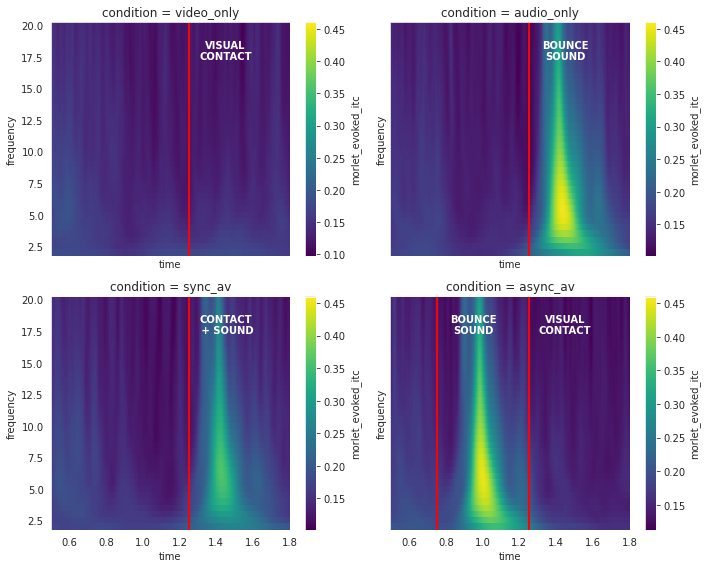

In [ ]:
ucsd.itc_plot_by_condition(ds, 'experiment1', slice(2,20), slice(.5,1.8), frontal_roi, vmax=.46)

In [ ]:
region = center

sync = ds.sel(channel=region,
           condition='sync_av',
           time=slice(1.225,1.675), #slice(.5, 1.8), #slice(1.225,1.875), # #slice(1.225,1.675), #, #
           frequency=slice(2,20)).mean(['channel'])

async_ = ds.sel(channel=region,
           condition='async_av',
           time=slice(.775,1.225),
           frequency=slice(2,20)).mean(['channel'])

'''occlusion = ds.sel(channel=region,
           condition='occlusion_av',
           time=slice(.5,1.8), #s, #slice(1.225,1.675),
           frequency=slice(2,20)).mean(['channel'])''';

clusters, cluster_p_values = ucsd.compute_cluster_permutation_test(sync, async_)
cluster_p_values

Using a threshold of 4.019541
stat_fun(H1): min=0.000000 max=15.186066
Running initial clustering
Found 4 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


array([0.034, 0.503, 0.087, 0.22 ])

plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

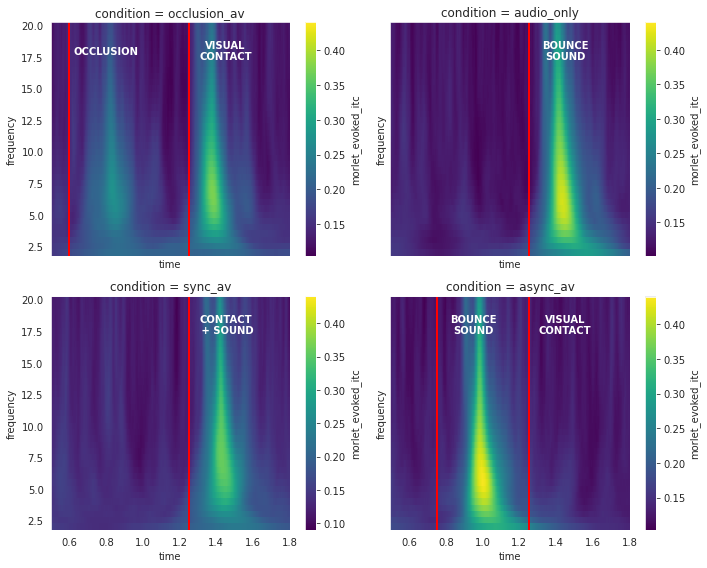

In [ ]:
ucsd.itc_plot_by_condition(ds, 'experiment2', slice(2,20), slice(.5,1.8), frontal_roi, vmax=.44)

## Induced ITC

plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

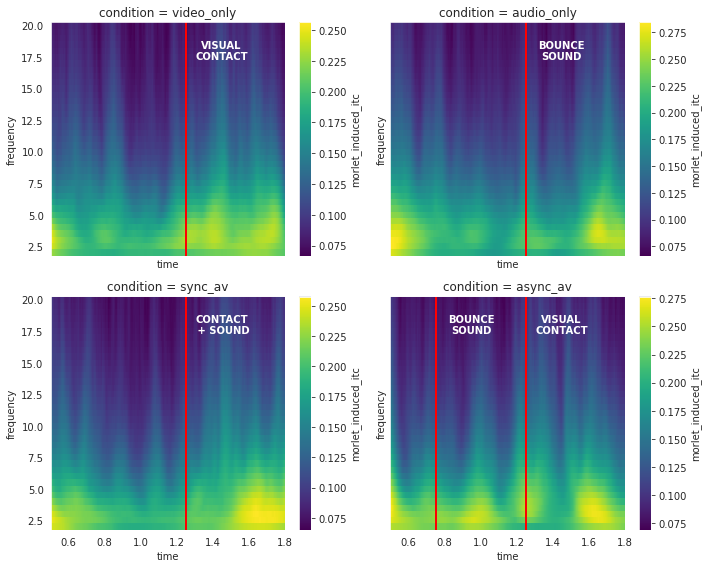

In [ ]:
ucsd.itc_plot_by_condition(ds, 'experiment1', slice(2,20), slice(.5,1.8), frontal_roi)

plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

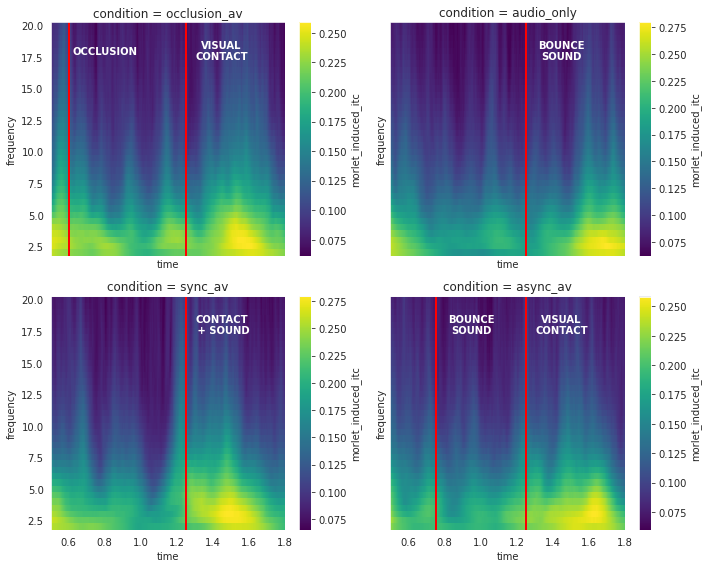

In [ ]:
ucsd.itc_plot_by_condition(ds, 'experiment2', slice(2,20), slice(.5,1.8), frontal_roi)

## Evoked Power

plotting... :   0%|          | 0/4 [00:00<?, ?it/s]

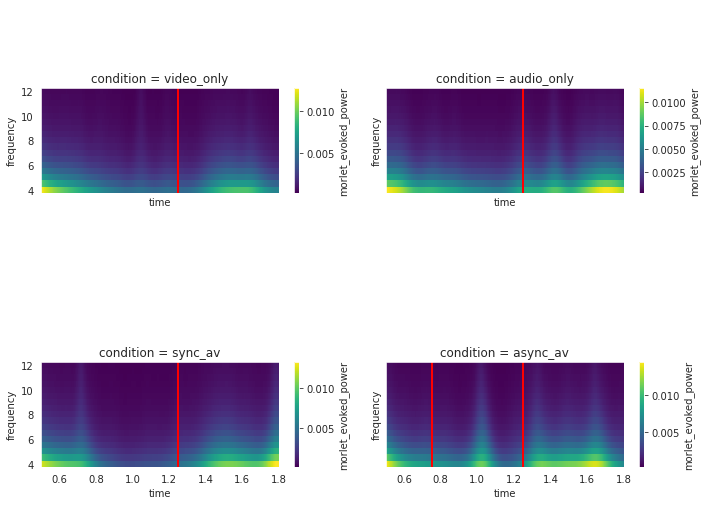

In [ ]:
ucsd.itc_plot_by_condition(ds, 'experiment1', slice(4,12), slice(.5,1.8), frontal_roi)

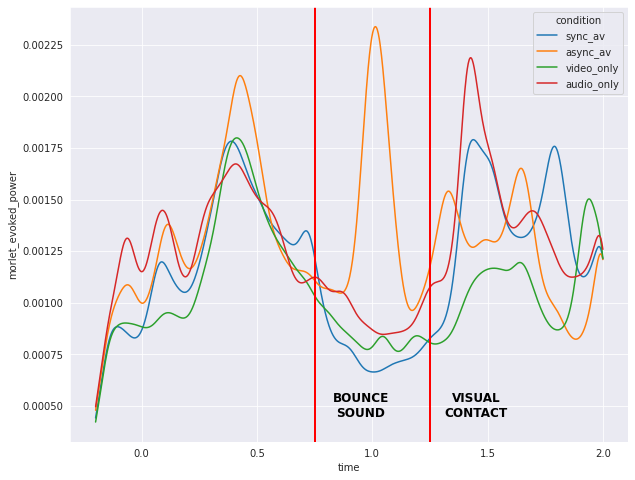

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ds.sel(channel=center,frequency=slice(4,7)).mean(['ID','channel','frequency']).plot(hue='condition')
ucsd.add_trial_information(y_text=.0005, fontsize=12, color='k', condition='async_av')

## Induced Power

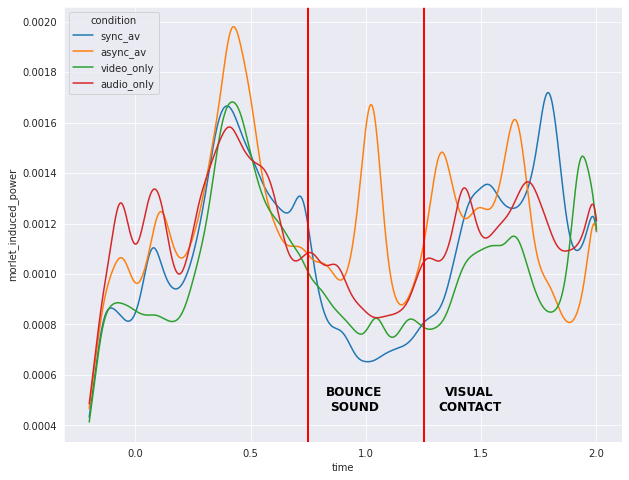

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ds.sel(channel=center,frequency=slice(4,7)).mean(['ID','channel','frequency']).plot(hue='condition')
ucsd.add_trial_information(y_text=.0005, fontsize=12, color='k', condition='async_av')